## Analysis of Hospital Admissions Data Using k-Means Clustering 

### Tejaswini Shekar

________________

### Table of of Contents:

A. Research Question

1. [Proposal of Question](#a1-research-question)
2. [Goal of Analysis](#a2-goal-of-analysis)

B. Justification of Technique

1. [Explanation of the Clustering Technique](#b1-explanation-of-the-clustering-technique)
2. [Summary of the Technique Assumption](#b2-summary-of-the-technique-assumption)
3. [Packages/Libraries](#b3-packageslibraries)

C. Data Preparation

1. [Data Preprocessing Goal](#c1-data-preprocessing-goal)
2. [Data Set Variables](#c2-data-set-variables)
3. [Data Preparation Steps](#c3-data-preparation-steps)
4. [Cleaned Data Set](#c4-cleaned-data-set)

D. Analysis

1. [Determine Optimal Number of Clusters](#d1-determine-optimal-number-of-clusters)
2. [Code Execution](#d2-code-execution)

E. Data Summary and Implications

1. [Quality of Clusters](#e1-quality-of-clusters)
2. [Results and Implications](#e2-results-and-implications)
3. [Limitation](#e3-limitation)
4. [Recommended Course of Action](#e4-recommended-course-of-action)

F. [Panopto](#f-panopto)

G. [Code Sources](#g-code-sources)

H. [Other Sources](#h-other-sources)


### A1. Research Question

My research question is, "Can k-means clustering be used to group patients into distinct, meaningful clusters based on their age, daily hospital charge, and additional charges?"

### A2. Goal of Analysis

The goal of the analysis is to group patients into meaningful clusters based on their age, daily charge, and additional charges.  By better understanding patient characteristics and grouping patients in this way, hospital administrators and healthcare workers can prioritise patients and deliver specialised care. This will also aid in more intentional and efficient allocation of resources, as well as improved patient outcomes.

### B1. Explanation of the Clustering Technique 

K-means clustering is an unsupervised machine learning algorithm, where "k" represents the number of clusters the data will be classified into. The algorithm groups unlabelled data into clusters based on similarity, while trying to minimize the variance within the clusters. 

"K" random points are first initialised, called the means/cluster centroids. Then each data point is classified into a cluster based on which mean it is closest to. The coordinates of the mean are updated to be the average of the data points in that cluster. This process is repeated iteratively a specified number of times and until the final clusters are obtained.[(GeeksforGeeks, Aug 2024)](#h-other-sources)

The expected outcome of analysis is to meaningfully group the patients into "k" clusters, so that patients with similar characteristics are present in the same cluster. 
This data can be used by hospital stakeholders for categorising patients and tailoring healthcare services accordingly. 

### B2. Summary of the Technique Assumption

The k-means clustering technique assumes that the clusters are sperical and isotropic, i.e., the radius of each cluster is equal in every direction. The centroid of each cluster is determined to be the average of the data points in it. 
As a result of this, k-means is negatively affected by clusters that are elongated/non-spherical and have varying spreads along different dimensions. [(GeeksforGeeks, Dec 2023)](#h-other-sources)

### B3. Packages/Libraries

1. Pandas: It is used for data manipulation.
2. NumPy: It is used to perform calculations on the data.
3. MatPlotLib: It is used to visualise data (scatter plots, elbow plot etc.)
4. Scikit-Learn
    - .preprocessing - StandardScaler: It the the scaler used to first standardize the data before implementing the model.
    - .cluster - Kmeans: This is the k-means model used for analysis.
    - .metrics - silhouette_score: It is an evaluation metric used to determine how well the data has been clustered.



### C1. Data Preprocessing Goal

The goal of data preprocessing is to ensure that the data is cleaned and scaled. 

- The data will be checked for null values, column headings will be renamed to be more accurate and only the variables required for analysis will be kept in the dataframe. 

- Since the ranges of the selected continuous variables vary, they need to be scaled to ensure that no single variable has a disproportionately large effect on analysis. The variables will be scaled using Standard Scaler and will have a mean of 0 and a standard deviation of 1.

### C2. Data Set Variables

The variables to be used for k-means clustering are:

1. Age (continuous, quantitative)\
It is the patient’s age, as reported in the admissions information.

2. TotalCharge (continuous, quantitative)\
It is the amount the patient is *charged daily*, not including any specialized treatments. It is an average per patient calculated by dividing the total charge by the number of days of hospitalization. 

3. Additional_charges (continuous, quantitative)\
It is the average amount the patient is charged for miscellaneous procedures, treatment, medicines, anesthesiology etc. 

### C3. Data Preparation Steps

The necessary packages will be imported and the data set will be read into the dataframe and explored briefly. The irrelevant columns will be dropped, and only the variables required for k-means analysis will be kept. The column names will be renamed to be uniform.

Next, the data will be scaled using Standard Scaler.

In [147]:
#import required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [148]:
# load data set into dataframe
df = pd.read_csv("./medical_clean.csv", index_col=0)

In [149]:
# overview of data
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.35,-86.73,2951,...,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.85,-85.23,11303,...,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54,-96.64,17125,...,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.90,-93.51,2162,...,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.60,-76.89,5287,...,2113.07,3716.53,2,1,3,3,5,3,4,3


In [150]:
#check shape of dataframe
df.shape

(10000, 49)

In [151]:
# check data types and verify there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [152]:
# drop irrelevant columns
df = df[["Age", "TotalCharge", "Additional_charges"]]

In [153]:
# rename column headings
df.rename(columns={
    "Age": "age",
    "TotalCharge" : "daily_charge",
    "Additional_charges": "additional_charges"
}, inplace=True)

In [154]:
#summary stats of selected variables - age, daily charge and additional charges
df.describe()

,age,daily_charge,additional_charges
count,10000.00,10000.00,10000.00
mean,53.51,5312.17,12934.53
std,20.64,2180.39,6542.60
min,18.00,1938.31,3125.70
25%,36.00,3179.37,7986.49
50%,53.00,5213.95,11573.98
75%,71.00,7459.70,15626.49
max,89.00,9180.73,30566.07


Text(0, 0.5, 'Number of Patients')

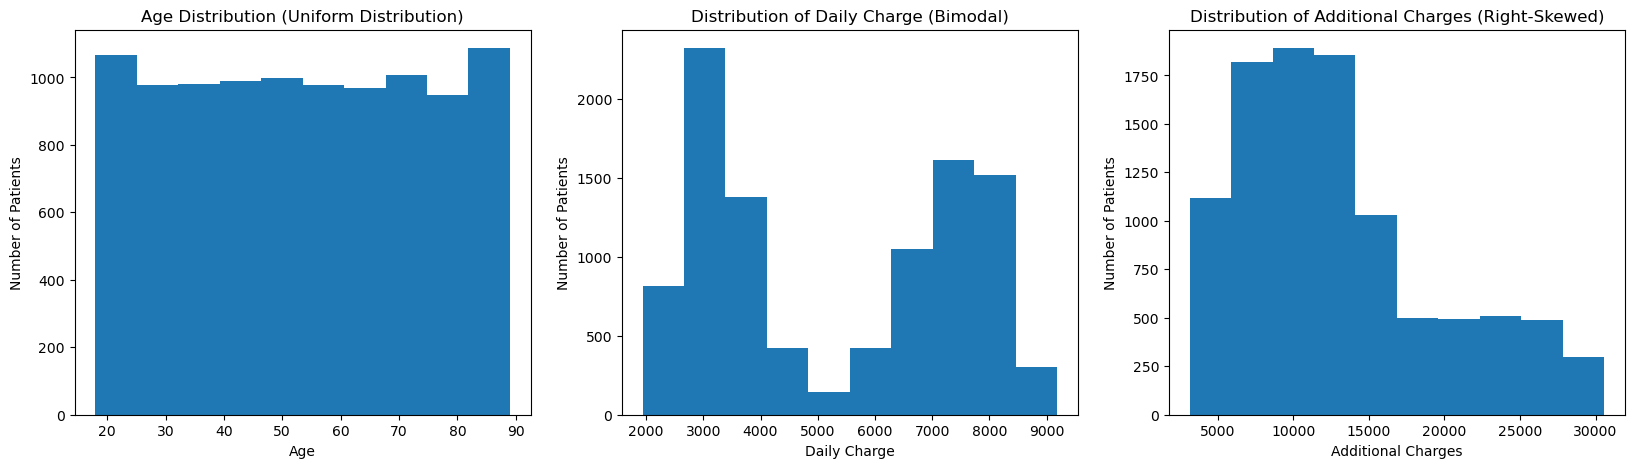

In [155]:
# distributions of selected variables - age, daily charge and additional charges
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.hist(df["age"])
plt.title("Age Distribution (Uniform Distribution)")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

plt.subplot(1,3,2)
plt.hist(df["daily_charge"])
plt.title("Distribution of Daily Charge (Bimodal)")
plt.xlabel("Daily Charge")
plt.ylabel("Number of Patients")

plt.subplot(1,3,3)
plt.hist(df["additional_charges"])
plt.title("Distribution of Additional Charges (Right-Skewed)")
plt.xlabel("Additional Charges")
plt.ylabel("Number of Patients")

In [156]:
# scale the data using Standard Scaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = ["age", "daily_charge", "additional_charges"])

In [157]:
# overview of final scaled data set 
# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format
scaled_df.head()

,age,daily_charge,additional_charges
0,-0.02,-0.73,0.77
1,-0.12,-0.51,0.72
2,-0.02,-1.32,0.70
3,1.19,-1.46,0.01
4,-1.53,-1.47,-1.41


In [158]:
# scaled data has mean 0 and standard deviation 1
scaled_df.describe()

,age,daily_charge,additional_charges
count,10000.00,10000.00,10000.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.72,-1.55,-1.50
25%,-0.85,-0.98,-0.76
50%,-0.02,-0.05,-0.21
75%,0.85,0.98,0.41
max,1.72,1.77,2.70


### C4. Cleaned Data Set

The final cleaned and scaled data set containing only the three variables used in analysis has been uploaded along with the PA. 

In [159]:
# export cleaned and scaled data set as csv file
scaled_df.to_csv("scaled_medical.csv", index = False)

### D1. Determine Optimal Number of Clusters

The optimal number of clusters for the k-means model will be determined by using an elbow plot. 
First, the k-means model is run for each "k" in a range of possible cluster values (e.g. 1-9), and the within-cluster sum of squares (WCSS)/inertia is calculated for each model. WCSS/inertia is the sum of the squared distances between each data point and its cluster centroid. A lower inertia indicates better clusters.

Then, a graph is plotted with the range of k values on the x-axis and WCSS on the y-axis. As the number of clusters increases, the WCSS decreases. At a certain point in the graph, called the elbow point, increasing the number of clusters does not significantly reduce the WCSS. (It instead leads to overfitting.) 
The "k" value at which the rate of decrease in WCSS sharply changes is the optimal number of clusters.[(GeeksforGeeks, Nov 2024)](#g-code-sources)

In this analysis, the optimal number of clusters was found to be 4. 

The code for determining the optimal number of clusters along with the rest of the analysis code is provided in section D2. 

### D2. Analysis Code

#### Find Optimal Value of k:

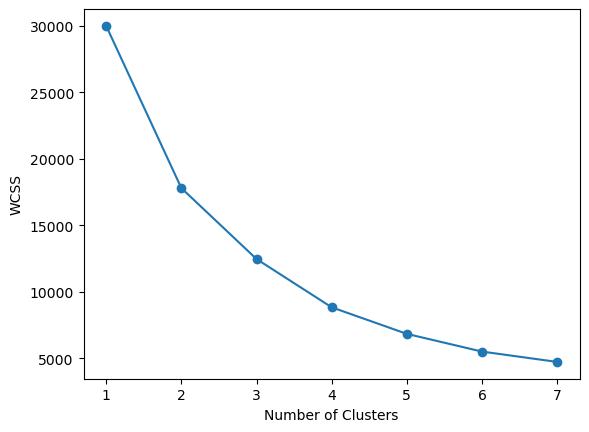

In [160]:
# determine optimal number of clusters
inertia = []
for k in range(1,8):
    kmean_model = KMeans(n_clusters=k, random_state=18, n_init=10)
    kmean_model.fit(scaled_df)
    inertia.append(kmean_model.inertia_)
    
#plot the elbow graph
# optimal number of clusters appars to be 4
plt.plot(range(1,8), inertia, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### k-Means Model:

In [161]:
# initialise KMeans model, set random state so that same results are obtained each time the model is run
kmeans_model = KMeans(n_clusters=4, random_state=18, n_init=10)

In [162]:
# fit model and get predicted clusters
kmeans_model.fit(scaled_df)
kmeans_model.predict(scaled_df)
labels = kmeans_model.labels_
labels

array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

#### Exploration of Final Clusters:

##### Number of Patients in Each Cluster:

In [165]:
# check number of patients in each cluster
cluster_counts = pd.Series(kmeans_model.labels_).value_counts()
cluster_counts

3    2692
0    2588
2    2388
1    2332
Name: count, dtype: int64

##### Cluster Centroids:

In [166]:
# find cluster centroids
centroids = kmeans_model.cluster_centers_     
# unscale data prior to visualising
centroids = scaler.inverse_transform(centroids)
centroids                     

array([[   37.42895753,  7372.40876407,  8459.88249949],
       [   71.63866267,  3283.57973597, 18092.92597619],
       [   71.56035205,  7404.20597668, 17881.58163656],
       [   37.27238945,  3233.0590874 ,  8382.73508444]])

In [167]:
# Create dataframe of centroids
centroids_dict = {
    "age_centroid": [centroids[0][0], centroids[1][0], centroids[2][0], centroids[3][0]], 
    "daily_charge_centroid": [centroids[0][1], centroids[1][1], centroids[2][1], centroids[3][1]], 
    "additional_charges_centroid": [centroids[0][2], centroids[1][2], centroids[2][2], centroids[3][2]]
}
centroids_df = pd.DataFrame(data=centroids_dict, index=["cluster_1", "cluster_2", "cluster_3", "cluster_4"])

# print analysis results
print(centroids_df)

           age_centroid  daily_charge_centroid  additional_charges_centroid
cluster_1         37.43                7372.41                      8459.88
cluster_2         71.64                3283.58                     18092.93
cluster_3         71.56                7404.21                     17881.58
cluster_4         37.27                3233.06                      8382.74


##### Visualise Clustered Data:

Text(0, 0.5, 'Additional Charges')

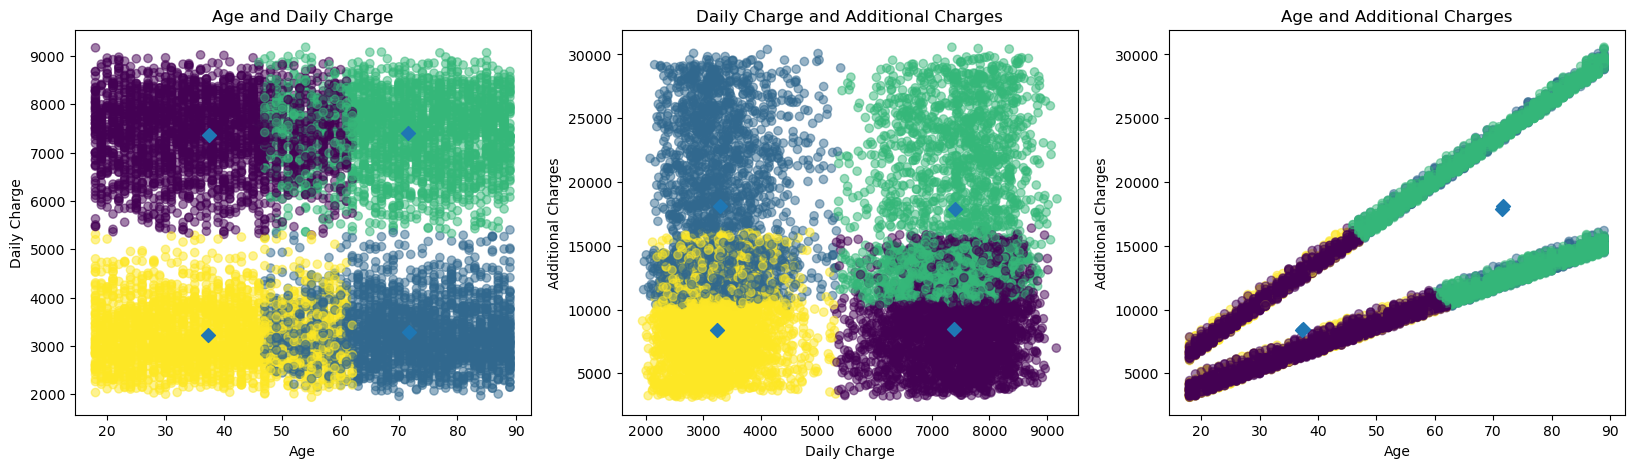

In [168]:
age_centroids = (37.42895753, 71.63866267, 71.56035205, 37.27238945)
daily_charge_centroids = (7372.40876407, 3283.57973597, 7404.20597668, 3233.0590874)
additional_charges_centroids = (8459.88249949, 18092.92597619, 17881.58163656, 8382.73508444)

#plot age and daily charge centroids
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt. scatter(df["age"], df["daily_charge"], c=labels, alpha=0.5)
plt.scatter(age_centroids, daily_charge_centroids, marker='D', s=50)
plt.title("Age and Daily Charge")
plt.xlabel("Age")
plt.ylabel("Daily Charge")

#plot daily charge and additional charge centroids
plt.subplot(1,3,2)
plt. scatter(df["daily_charge"], df["additional_charges"], c=labels, alpha=0.5)
plt.scatter(daily_charge_centroids, additional_charges_centroids, marker='D', s=50)
plt.title("Daily Charge and Additional Charges")
plt.xlabel("Daily Charge")
plt.ylabel("Additional Charges")

#plot age and additional charge centroids
plt.subplot(1,3,3)
plt.scatter(df["age"], df["additional_charges"], c=labels, alpha=0.5)
plt.scatter(age_centroids, additional_charges_centroids, marker='D', s=50)
plt.title("Age and Additional Charges")
plt.xlabel("Age")
plt.ylabel("Additional Charges")

#### Evaluate Cluster Quality:

In [169]:
# evaluate clusters using silhouette score
silhouette = silhouette_score(scaled_df, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.4019479901586876


In [170]:
# WCSS/inertia of final model
inertia = kmeans_model.inertia_
print("WCSS/Inertia:", inertia)

WCSS/Inertia: 8830.988949677478


### E1. Quality of Clusters

The quality of the clustering can be determiend by the silhouette score. The score ranges from -1 to +1. A silhouette score of -1 means that the data points in the clusters are not similar to each other and a score of 0 is neutral. A score of +1 means that the data points in the clusters are correctly assigned and the clusters are easily distinguishable. The silhouette score for my analysis is **0.4019**, which means that my clusters contain patients that have similar characteristics. 

The cluster quality can also be determined by the inertia, which measures the spread of the clusters. A lower value of inertia indicates better clusters. In section D1, the number of clusters "k" for the k-means model was determined by trying to reduce the calculated inertia, without overfitting. 
The inertia of the final model is 8830.9889. 

### E2. Results and Implications

The k-means model grouped the data set into 4 labelled clusters, with a silhouette score of 0.4019 and an inertia of 8830.9889. The number of patients in each cluster ranged from about 2300-2700. The clusters centroids were obtained as an array, using the .cluster_centers method. Each list in this array represents the coordinates for a cluster-centroid in a 3-dimensional space (since 3 variables were used in the analysis). For example, the first list in the array was [37.42895753,  7372.40876407,  8459.88249949]. This is the location of the center of the first cluster, where 37.42895753 is the "age" mean, 7372.40876407 is the "daily_charge" mean and 8459.88249949 is the "addiitonal_charges" mean.

The clusters were then explored to gain insight into their composition.  

- Cluster 1 has middle-aged patients (aged about 37 years), with a high average daily charge (about $7,400) and lower additional charges (about $8,400). 
- Cluster 4 has middle-aged patients (about 37 years) with a comparatively lower daily charge (about $3,200), and similarly low additional charges (about $8,400). 
- Cluster 2 has elderly patients (about 71 years), with a lower average daily charge (about $3,200) and high additional charges (about $18,000).
- Cluster 3 also has elderly patients (about 71 years), with comparatively higher daily charges ($7,400) and high additional charges (about $18,000).

    *The number of patients in each cluster and the exact coordinates of each cluster centroid are given below:*  

    | Cluster    | Number of Patients | Age Centroid | Daily Charge Centroid | Additional Charges Centroid |
    | :-------- | :--------: | :--------: |:--------: |:--------: |
    | **1** | 2588 | 37.42895753 | 7372.40876407 | 8459.882499490 |
    | **2** | 2332 | 71.63866267 | 3283.57973597 | 18092.92597619 |
    | **3** | 2388 | 71.56035205 | 7404.20597668 | 17881.58163656 |
    | **4** | 2692 | 37.27238945 | 3233.05908740 | 8382.735084440 |

The clusters were also visualised, two variables at a time, using scatter plots. The plots show the grouping of patients by color (purple, green, yellow, blue), with the cluster centroids shown as blue diamonds. 

The scatter plots of the clustered data can also be compared with the distributions of the three individual variables (see section "C3-Data Preparation" for distribution graphs). 
- For example, daily charge has a *bimodal distribution*, with peaks at about $3,200 and $7,400. These peaks coincide with its cluster means, also about $3,200 and $7,400. 
- Similarly, additional charges has a *right-skewed* distribution which can be split into two parts, the left half which peaks at about $9,000 and the right half which has a more flat, trailing shape.  The means for these two halves coincide with the cluster means (about $8,400 and $18,000). 
- The k-means model also appears to have divided the age variable, which has a *uniform distribution*, into 2 halves. The cluster means for age coincide with the midpoints of the two halves (both about 37 years and 71 years).

From exploring the analysis results, we see that the k-means model has grouped the patients into 4 meaningful clusters based on age, daily charge and additional charges. Further, the value of the silhouette score (0.4019) is greater than 0, which indicates that the clusters are distinguishable and contain similar patients.
These clusters can be used by stakeholders to broadly classify patients by age and hospital expenditure, with each cluster requiring different levels of care. Older patients with greater additional charges may need more specialised care during admission and strict follow-up after discharge to prevent readmission. On the other hand, the younger group of patients with lower daily and additional charges may require less intervention and minimal follow-up. 
In this way, the results of the analysis can drive decision-making regarding best practices for healthcare delivery, and efficient follow-up care after discharge. 

### E3. Limitation

One of the limitations of the analysis is the utilisation of an elbow plot to determine the optimal number of clusters for the k-means model. The interpretation of the elbow plot can be ambiguous and highly subjective [(Chawla, June 2023)](#h-other-sources). The clarity of the plot also depends on the nature of the data set. The plot fails when the data is evenly distributed. Further, the elbow plot only considers the within-cluster distances. An alternative method to determine the best number of clusters is to use the average silhouette score. It provides objective results without ambiguity, while considering both intra and inter-cluster distance. Its results are also independent of the nature of the data set [(Habib, Feb 2021)](#h-other-sources).

### E4. Recommended Course of Action

Based on the analysis results, I recommend a similar k-means clustering analysis on other continuous variables from the data set. Expanding the selection of variables used in the k-means clustering can provide additional insight into patient admissions and outcomes. A more in-depth analysis can improve healthcare service delivery and optimise resource allocation to ensure the best patient outcomes. 
Also, the silhouette score can be used to determine the optimal number of clusters instead of the elbow plot since it is more objective and may provide more accurate results. 

### F. Panopto

Link to Panopto recording: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2313d5c8-0220-4228-bb84-b23700b1ef28

### G. Code Sources

1. GeeksforGeeks. (02 Nov, 2024). *Elbow Method for optimal value of k in KMeans.* https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/.

### H. Other Sources

1. GeeksforGeeks. (09 December, 2023). *Demonstration of K-Means Assumptions.* https://www.geeksforgeeks.org/demonstration-of-k-means-assumptions/. 

2. GeeksforGeeks. (29 August, 2024). *K means Clustering – Introduction.* https://www.geeksforgeeks.org/k-means-clustering-introduction/. 
 
3. Chawla, A. (16 June 2023). *The Limitations Of Elbow Curve And What You Should Replace It With.* Daily Dose of Data Science. https://blog.dailydoseofds.com/p/the-limitations-of-elbow-curve-and. 

4. Habib, A. (20 February 2021). *Elbow Method vs Silhouette Co-efficient in Determining the Number of Clusters.* Medium. https://adria708.medium.com/elbow-method-vs-silhouette-co-efficient-in-determining-the-number-of-clusters-33baff2fbeee.